# Introduction
    This Project is intended to cover 2 fields within Data Analysis and Machine Learning.
    
    During this project, a study will be carried out on Recommendation System and Market Basket Analysis.
    The project will be divided into 2 sessions, the first being Recommendation System, the second Market Basket Analysis.


# •	First Session

### What is the purpose of a recommendation system for online retail business in machine learning?

    Recommender systems are among the most powerful machine learning systems used by online retailers to increase sales attempting to predict users' interests and recommend products that are likely to be of interest to them. These days a recommender system is a useful tool that can recommend personalized products or services to a specific customer, consequently increasing business sales and attracting new customers.

    According to reports, 35% of Amazon purchases are influenced by the product recommendation system. ((Smart Software Development, 2020), (MacKenzie, Meyer and Noble, 2013))
    
    Alibaba, China's largest e-commerce company, increased its revenue by 51% to 93.5 billion yuan following the implementation of new recommendation-based advertising. (Bloomberg L.P., 2019)
    
    There have been few published studies that provide direct evidence of the value of recommender systems to e-Businesses, such as LeShop, a consumer-packaged goods supermarket, which demonstrated an increase of 0.30% in direct monthly revenue and at least 66% and on average 336% in indirect extra revenue. (Benjamin Dias et al., 2014)
    
    To conclude the purpose and indispensability of Recommendations systems is that typically speed up searches and make it easier for users to access content of interest, as well as surprise them with offers they would not have searched for, additionally, businesses can attract and keep customers by sending emails that include links to fresh offers that align with the recipients' interests or recommendations for movies and TV shows that fit their profiles, consequently the user begins to feel known and understood, which increases their propensity to purchase more items or watch more content. By incorporating recommendations into systems and products, the companies and retails can give users that extra value. In addition, knowing what a user wants gives a business a competitive edge and lessens the risk of losing a client to a rival where enables businesses to outperform rivals and eventually boost profits.


### Briefly compare Content and Collaborative filtering.
    Recommendation engines are classified into two types: collaborative filtering and content-based filtering.

    Instead of relying on user interactions and feedback, the content-based approach requires a substantial amount of information about the features of the items. They could be details about movies like the genre, release year, director, or star, or they could be the text of articles that can be extracted using natural language processing. On the other hand, collaborative filtering only requires the user's historical preference for a selection of items to recommend, and since it is based on historical data, the fundamental premise is that users who have previously agreed will likely continue to do so in the future.

    The collaborative filtering model can aid users in discovering new interests, and even if the machine learning system is unaware of the user's interest in a particular item, the model may still suggest it because other users who share that interest are interested in it. In contrast, a content-based model can only make suggestions based on the user's current interests, and as a result, it is only partially able to expand on the user's current interests.

    The recommendations made by a Content-Based filtering model are specific to each user, so no information about other users is required. As a result, scaling the same down to a big user base is made simpler. Collaborative filtering methods cannot be compared to this in any way.

    While content-based filtering requires that we know both the user and item content, the collaborative algorithm only uses user behaviours to recommend items. ((Baptiste Rocca, 2019), (Glauber and Loula, 2019))


### Train and test machine learning models for the user-user or item-item collaborative filtering. Justify your recommendations for the considered scenario by providing a conceptual insight.

# 1. Recommendation System

## 1.1. Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import panel as pn
pn.extension("tabulator")

import hvplot.pandas
books = pd.read_csv('data/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('data/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

C:\Users\rapha\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3361: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping 

## 1.2. Visualizing the Datasets and Caracteristics

In [2]:
books.head(3)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [4]:
ratings.head(3)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
users.head(3)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [7]:
print("unique isbn: ",len(users["userID"].unique()))
print("total rows: ",users.shape[0])
print("unique title: ",len(ratings["userID"].unique()))
print("total rows: ",ratings.shape[0])

unique isbn:  278858
total rows:  278858
unique title:  105283
total rows:  1149780


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## 1.3 Checking Shape

In [9]:
print("Books Shape: " ,books.shape )
print("Ratings Shape: " ,ratings.shape )
print("Users Shape: " ,users.shape )

Books Shape:  (271360, 8)
Ratings Shape:  (1149780, 3)
Users Shape:  (278858, 3)


## 1.4 Checking Missing Values

In [10]:
print("Any null values in Books:\n" ,books.isnull().sum())
print("Any null values in Ratings:\n ",ratings.isnull().sum())
print("Any null values in Users:\n",users.isnull().sum())

Any null values in Books:
 ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64
Any null values in Ratings:
  userID        0
ISBN          0
bookRating    0
dtype: int64
Any null values in Users:
 userID           0
Location         0
Age         110762
dtype: int64


## 1.5 Checking Duplicate

In [11]:
print("Any duplicate row in Books:\n" ,books[books.duplicated()].sum())
print("Any duplicate row in Ratings:\n ",ratings[ratings.duplicated()].sum())
print("Any duplicate row in Users:\n",users[users.duplicated()].sum())

Any duplicate row in Books:
 ISBN                 0.0
bookTitle            0.0
bookAuthor           0.0
yearOfPublication    0.0
publisher            0.0
imageUrlS            0.0
imageUrlM            0.0
imageUrlL            0.0
dtype: float64
Any duplicate row in Ratings:
  userID        0.0
ISBN          0.0
bookRating    0.0
dtype: float64
Any duplicate row in Users:
 userID      0.0
Location    0.0
Age         0.0
dtype: float64


##  2.User-Based Collaborative Filtering Recommendation Algorithm

       User-based collaborative filtering makes recommendations based on previous user-product interactions. The algorithm is based on the assumption that similar users prefer similar products.
       Typically, a user-based collaborative filtering algorithm follows these steps:
        
        1.Find similar users based on interactions with common items.
        2.Identify the items rated high by similar users but have not been exposed to the active user of interest.
        3.Calculate the weighted average score for each item.
        4.Rank items based on the score and pick the top n items to recommend.
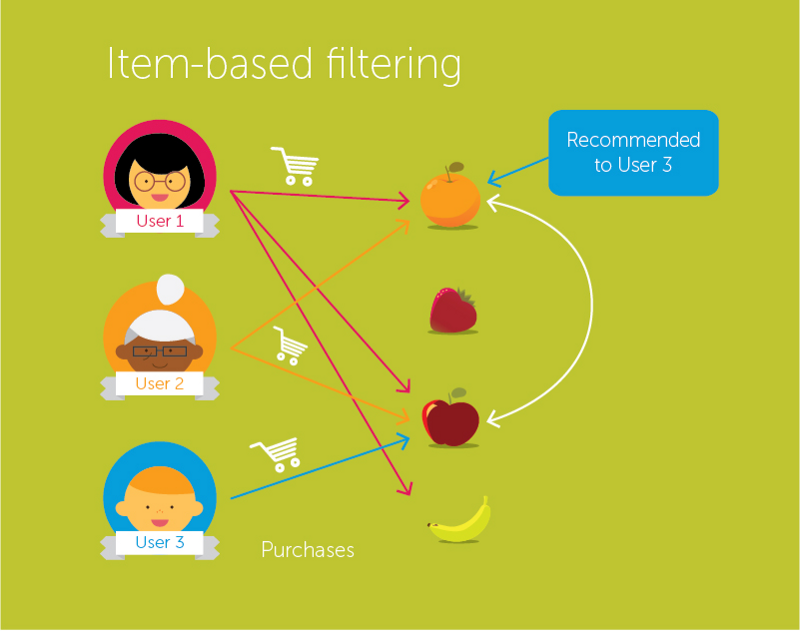

    This graph illustrates how user-based collaborative filtering works using a simplified example.

    User1 likes apples, orange and banana. 
    User2 likes apples and orange. 
    User3 likes only apple.
    
    Because User1 and User2 like the same fruit as User3, apple, they are similar users.
    Since User1 and User2 likes Orange and User3 has not been exposed to orange yet, the recommendation system recommends orange to User3.

## 2.1 Read Data
    - Take a look at the data

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526356 entries, 1456 to 1147616
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   userID      526356 non-null  int64 
 1   ISBN        526356 non-null  object
 2   bookRating  526356 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.1+ MB


In [16]:
ratings.head(3)

,userID,ISBN,bookRating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8


In [17]:
# Number of users
print('The ratings dataset has', ratings['userID'].nunique(), 'unique users')
# Number of books
print('The ratings dataset has', ratings['ISBN'].nunique(), 'unique books')
# Number of ratings
print('The ratings dataset has', ratings['bookRating'].nunique(), 'unique ratings')
# List of unique ratings
print('The unique ratings are', sorted(ratings['bookRating'].unique()))

The ratings dataset has 899 unique users
The ratings dataset has 207291 unique books
The ratings dataset has 11 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


       There are 3 columns in the Ratings dataset, userID, ISBN (Books ID), bookRating.
       The dataset contained 526.356 records, and there is no missing values.
       The rating dataset has 899 unique users, 207291 unique books and 11 unique ratings.

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [19]:
books.head(3)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [20]:
# Number of book Author
print('The books dataset has', books['bookAuthor'].nunique(), 'unique bookAuthor')
# Number of books
print('The books dataset has', books['ISBN'].nunique(), 'unique books')
# Number of year
print('The books dataset has', books['yearOfPublication'].nunique(), 'unique yearOfPublication')
# Number of publisher
print('The books dataset has', books['publisher'].nunique(), 'unique publisher')
# List of unique ratings
# print('The books ratings are', sorted(ratings['bookRating'].unique()))

The books dataset has 102023 unique bookAuthor
The books dataset has 271360 unique books
The books dataset has 202 unique yearOfPublication
The books dataset has 16807 unique publisher


    There are 8 columns in the books dataset, ISBN (Books ID), bookTitle, bookAuthor, yearOfPublication, publisher, imageUrlS, imageUrlM, imageUrlL.
    The dataset contained 271.360 records, and there is some missing values, 1 in bookAuthor, 2 in publisher and 3 in imageUrlL.
    The books dataset has 102023 unique bookAuthor, 271360 unique books, 202 unique yearOfPublication and 16807 unique publisher.

## 2.2 Merge ratings and books dataset

        Using ISBN as the matching key, I appended movie information to the rating dataset and named it df. So now I have the books title and books rating in the same dataset!

In [21]:
# Merging ratings and movies datasets
df = pd.merge(ratings, books, on='ISBN', how='inner')
# Taking a look at the data
df.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487671 entries, 0 to 487670
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   userID             487671 non-null  int64 
 1   ISBN               487671 non-null  object
 2   bookRating         487671 non-null  int64 
 3   bookTitle          487671 non-null  object
 4   bookAuthor         487671 non-null  object
 5   yearOfPublication  487671 non-null  object
 6   publisher          487669 non-null  object
 7   imageUrlS          487671 non-null  object
 8   imageUrlM          487671 non-null  object
 9   imageUrlL          487668 non-null  object
dtypes: int64(2), object(8)
memory usage: 40.9+ MB


## 2.3 Exploratory Data Analysis (EDA)

    In this step I will filter the books and keep only those with over 100 ratings for the analysis.
    This is to make a reduction on the dataset in order to help the algorithm as it involves calculating the similarity for each user and then calculating prediction for each similarity score.
    To do that, I first group the books by title, count the number of ratings, and keep only the books with greater than 100 ratings.

    The average ratings for the books are calculated as well.

In [23]:
# Aggregate by books
agg_ratings = df.groupby('bookTitle').agg(mean_rating = ('bookRating', 'mean'),
                                                number_of_ratings = ('bookRating', 'count')).reset_index()
# Keep the books with over 100 ratings
agg_ratings_100 = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7053 entries, 24 to 160243
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bookTitle          7053 non-null   object 
 1   mean_rating        7053 non-null   float64
 2   number_of_ratings  7053 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 220.4+ KB


In [24]:
# Checking popular books
agg_ratings_100.sort_values(by='number_of_ratings', ascending=False).head()

,bookTitle,mean_rating,number_of_ratings
156313,Wild Animus,0.438017,363
19140,Bridget Jones's Diary,2.664260,277
130224,The Lovely Bones: A Novel,3.203704,270
132891,The Notebook,2.070539,241
133898,The Pelican Brief,1.978814,236


    I use a jointplot to check the correlation between the mean rating and the number of ratings.

    I can see an downward trend from the scatter plot, showing that popular books get low ratings.

    The average rating distribution shows that most books in the dataset have an average rating between 2 and 3.

    The number of rating distribution shows that most books have less than 200 ratings.

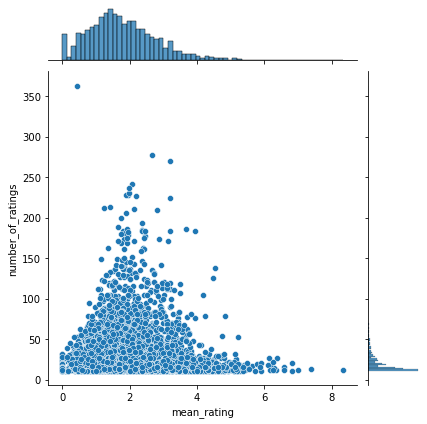

In [25]:
import seaborn as sns
# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_100)

        In order to keep only the 156 books with more than 100 ratings, I joined the books with the user-rating level dataframe (agg_ratigs_100) and using the parameters how='inner' and on='title', only the books with more than 100 ratings will be in the new dataframe.

In [26]:
# Merge data
df_books100 = pd.merge(df, agg_ratings_100[['bookTitle']], on='bookTitle', how='inner')
df_books100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187595 entries, 0 to 187594
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   userID             187595 non-null  int64 
 1   ISBN               187595 non-null  object
 2   bookRating         187595 non-null  int64 
 3   bookTitle          187595 non-null  object
 4   bookAuthor         187595 non-null  object
 5   yearOfPublication  187595 non-null  object
 6   publisher          187594 non-null  object
 7   imageUrlS          187595 non-null  object
 8   imageUrlM          187595 non-null  object
 9   imageUrlL          187595 non-null  object
dtypes: int64(2), object(8)
memory usage: 15.7+ MB


In [27]:
# Number of users
print('The df_books100 dataset has', df_books100['userID'].nunique(), 'unique users')
# Number of movies
print('The df_books100 dataset has', df_books100['bookTitle'].nunique(), 'unique books')
# Number of ratings
print('The df_books100 dataset has', df_books100['bookRating'].nunique(), 'unique ratings')
# List of unique ratings
print('The df_books100 ratings are', sorted(df_books100['bookRating'].unique()))

The df_books100 dataset has 896 unique users
The df_books100 dataset has 7053 unique books
The df_books100 dataset has 11 unique ratings
The df_books100 ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


    After filtering the books with over 100 ratings, I have 876 users that rated 156 books.

## 2.4 Create User-books Matrix
     I will transform the dataset into a matrix format. The rows of the matrix are users, and the columns of the matrix are books Title. The value of the matrix is the user rating of the book if there is a rating, otherwise, it shows ‘NaN’.

In [28]:
# Create user-item matrix
matrix_user_books = df_books100.pivot_table(index='userID', columns='bookTitle', values='bookRating')
matrix_user_books.head()

bookTitle,"Q-Space (Star Trek The Next Generation, Book 47)",'Salem's Lot,10 Lb. Penalty,1001 Ways to Be Romantic,101 Dalmatians,"14,000 Things to Be Happy About",16 Lighthouse Road,1916: A Novel of the Irish Rebellion (Irish Century),1984,1st to Die: A Novel,...,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zoya,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""","\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.5 Data Normalization
    I normalize the rating by obtaining the average rating of each user because some people have a tendency to rate things higher than others.

    After normalization, books with ratings that are lower than the average user rating receive a negative value, and books with ratings that are higher than the average user rating receive a positive value.

In [29]:
# Normalize user-item matrix
matrix_norm = matrix_user_books.subtract(matrix_user_books.mean(axis=1), axis = 'rows')
matrix_norm.head()

bookTitle,"Q-Space (Star Trek The Next Generation, Book 47)",'Salem's Lot,10 Lb. Penalty,1001 Ways to Be Romantic,101 Dalmatians,"14,000 Things to Be Happy About",16 Lighthouse Road,1916: A Novel of the Irish Rebellion (Irish Century),1984,1st to Die: A Novel,...,Zia,Zlata's Diary: A Child's Life in Sarajevo,Zodiac: The Eco-Thriller,Zombies of the Gene Pool,Zoya,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""","\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",e,stardust
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.332143,NaN,...,NaN,NaN,-1.667857,NaN,NaN,NaN,NaN,NaN,NaN,-1.667857
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.073171,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.782991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.6 Identify Similar Users
    There are various methods for calculating similarities. Pearson correlation and cosine similarity are two popular techniques.

    I will calculate the user similarity matrix using Pearson correlation for the User-User Collaborative Filtering where I want to my Collaborative Filtering be based in the correlation of the uses insted the similarity, in other words be based in a mutual relationship or connection between two or more user.

In [30]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity.head()

userID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
userID,,,,,,,,,,,,,,,,,,,,,
254,1.000000,NaN,-0.248069,1.000000,1.000000,NaN,-0.576215,-1.0,NaN,0.006931,...,NaN,0.272166,NaN,0.356753,NaN,0.141521,-0.276847,NaN,NaN,NaN
2276,NaN,1.000000,0.131201,NaN,NaN,NaN,NaN,NaN,NaN,0.084215,...,-0.650011,-0.430331,-0.971061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,-0.248069,0.131201,1.000000,NaN,0.244267,NaN,0.331572,NaN,-0.035223,-0.317596,...,0.034383,-0.250000,-0.238727,-0.219535,NaN,0.137505,-0.017653,1.0,-1.0,-0.002081
2977,1.000000,NaN,NaN,1.000000,-0.399114,NaN,-0.654654,NaN,NaN,0.268911,...,NaN,NaN,0.577350,NaN,NaN,-0.352282,NaN,NaN,NaN,NaN
3363,1.000000,NaN,0.244267,-0.399114,1.000000,NaN,0.273397,NaN,NaN,-0.101568,...,NaN,NaN,NaN,NaN,0.557086,-0.099326,-0.148252,NaN,NaN,-0.047946


    The values in the user similarity matrix range from -1 to 1, with -1 representing opposite books preference and 1 representing same books preference.

In [31]:
# from sklearn.metrics.pairwise import cosine_similarity
# #User similarity matrix using cosine similarity
# user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
# user_similarity_cosine

    I will pick one userID as an example to illustrate how my User-User Collaborative Filtering find similar users.

    First I will exclude user ID 254 from the similar user list and decide the number of similar users.

In [32]:
#Pick a user ID
picked_userid = 254
# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)
# Take a look at the data
user_similarity.head()

userID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
userID,,,,,,,,,,,,,,,,,,,,,
2276,NaN,1.000000,0.131201,NaN,NaN,NaN,NaN,NaN,NaN,0.084215,...,-0.650011,-0.430331,-0.971061,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,-0.248069,0.131201,1.000000,NaN,0.244267,NaN,0.331572,NaN,-0.035223,-0.317596,...,0.034383,-0.250000,-0.238727,-0.219535,NaN,0.137505,-0.017653,1.0,-1.0,-0.002081
2977,1.000000,NaN,NaN,1.000000,-0.399114,NaN,-0.654654,NaN,NaN,0.268911,...,NaN,NaN,0.577350,NaN,NaN,-0.352282,NaN,NaN,NaN,NaN
3363,1.000000,NaN,0.244267,-0.399114,1.000000,NaN,0.273397,NaN,NaN,-0.101568,...,NaN,NaN,NaN,NaN,0.557086,-0.099326,-0.148252,NaN,NaN,-0.047946
3757,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Number of similar users
n = 10
# User similarity threashold
user_similarity_threshold = 0.5
# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 254 are userID
228681    1.0
94242     1.0
2977      1.0
157247    1.0
131402    1.0
129074    1.0
124079    1.0
122881    1.0
117251    1.0
164533    1.0
Name: 254, dtype: float64


    n = 10 indicates that we want to select the top 5 most similar users for user ID 60337.
    I needed to set a positive threshold because user-based collaborative filtering makes recommendations based on users with similar tastes. (IBM Corporation, 2021)
    In this case, I seted the user similarity threshold to 0.5, which means that a user must have a  high Pearson correlation coefficient of at least 0.5 in order to be considered similar. (Laerd Statistics, 2018)
    
    After setting the number of similar users and similarity threshold, I sort the user similarity value from the highest and lowest, then printed out the most similar usersID and the Pearson correlation value.

In [34]:
# Books that the target user has watched
picked_userid_read = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_read

bookTitle,1984,7b,A Bend in the Road,ANGELA'S ASHES,American Gods,American Gods: A Novel,Amethyst Dreams,Angela's Ashes (MMP) : A Memoir,Anil's Ghost (Vintage International),Animal Farm,...,The Witching Hour (Lives of the Mayfair Witches),Thief of Time,Thinner,Tiger Prince,Together Alone,White Oleander : A Novel,Wilderness Tips,Windmills of the Gods,Zodiac: The Eco-Thriller,stardust
userID,,,,,,,,,,,,,,,,,,,,,
254,7.332143,-1.667857,-1.667857,-1.667857,8.332143,7.332143,-1.667857,-1.667857,-1.667857,6.332143,...,-1.667857,-1.667857,-1.667857,-1.667857,-1.667857,-1.667857,-1.667857,-1.667857,-1.667857,-1.667857


    I will reduce the number of books in the pool by removing those that have been rated by the target user (user ID 257 in this example).
    I only keep the books that other users have rated.
    I kept only the row for userId=257 in the user-item matrix and removed the items with missing values to remove the books rated by the target user.

In [35]:
# Books that similar users rated. Remove books that none of the similar users have rated
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_books

bookTitle,10 Lb. Penalty,1984,2001: A Space Odyssey,204 Rosewood Lane,2061: Odyssey Three,22 Indigo Place,24 Hours,3001: The Final Odyssey,50 Simple Things You Can Do to Save the Earth,84 Charing Cross Road,...,Worst Fears,Wounded Land Covenant 1 (Wounded Land),Writing Down the Bones,Wuthering Heights (Penguin Classics),Yeager: An Autobiography,Year In Provence,Year of Wonders,You Belong To Me,You Can't Keep a Good Woman Down,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.368421,NaN,NaN,NaN
94242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.25,NaN
122881,NaN,6.818182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124079,NaN,NaN,NaN,NaN,-0.539326,-0.539326,-0.539326,-0.539326,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129074,4.745665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.254335,NaN,...,NaN,2.745665,NaN,-3.254335,4.745665,NaN,NaN,NaN,NaN,NaN
131402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.361345,...,NaN,NaN,8.638655,NaN,NaN,7.638655,7.638655,NaN,NaN,NaN
157247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164533,NaN,6.411765,-2.588235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    To keep only the books of similar users, I keep the user IDs from the top 5 similar user lists and delete the books with all missing values. All missing values for a book indicate that none of the similar users rated it.

    Next, I will drop the books that user ID 257 rated from the similar user books list. 
    errors='ignore' drops columns if they exist without giving an error message.

In [36]:
# Remove the rated books from the books list
similar_user_books.drop(picked_userid_read.columns,axis=1, inplace=True, errors='ignore')
# Take a look at the data
similar_user_books

bookTitle,10 Lb. Penalty,2001: A Space Odyssey,204 Rosewood Lane,2061: Odyssey Three,22 Indigo Place,24 Hours,3001: The Final Odyssey,50 Simple Things You Can Do to Save the Earth,84 Charing Cross Road,"A Call to Darkness (Star Trek The Next Generation, Book 9)",...,Worst Fears,Wounded Land Covenant 1 (Wounded Land),Writing Down the Bones,Wuthering Heights (Penguin Classics),Yeager: An Autobiography,Year In Provence,Year of Wonders,You Belong To Me,You Can't Keep a Good Woman Down,"\O\"" Is for Outlaw"""
userID,,,,,,,,,,,,,,,,,,,,,
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.368421,NaN,NaN,NaN
94242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.25,NaN
122881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124079,NaN,NaN,NaN,-0.539326,-0.539326,-0.539326,-0.539326,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129074,4.745665,NaN,NaN,NaN,NaN,NaN,NaN,-3.254335,NaN,-3.254335,...,NaN,2.745665,NaN,-3.254335,4.745665,NaN,NaN,NaN,NaN,NaN
131402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.361345,NaN,...,NaN,NaN,8.638655,NaN,NaN,7.638655,7.638655,NaN,NaN,NaN
157247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164533,NaN,-2.588235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    I will decide which books to recommend to the target user. 
    The weighted average of user correlation score and book rating determines the recommended books.
    The correlation scores are used to weight the book ratings, so users with higher correlation get heavier weights.

In [37]:
# A dictionary to store item scores
books_score = {}
# Loop through items
for i in similar_user_books.columns:
  # Get the ratings for books i
  books_rating = similar_user_books[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the books has rating
    if pd.isna(books_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the books rating
      score = similar_users[u] * books_rating[u]
      # Add the score to the total score for the books so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  books_score[i] = total / count
# Convert dictionary to pandas dataframe
books_score = pd.DataFrame(books_score.items(), columns=['booksTitle', 'books_score'])
    
# Sort the books by score
ranked_books_score = books_score.sort_values(by='books_score', ascending=False)
# Select top m books
m = 10
ranked_books_score.head(m)

,booksTitle,books_score
164,Disclosure,8.827907
60,Angry Housewives Eating Bon Bons (Ballantine R...,8.827907
477,Rebecca,8.827907
855,Writing Down the Bones,8.638655
755,The Sweet Potato Queens' Book of Love,8.638655
286,How Wal-Mart is Destroying America and The Wor...,8.460674
405,New Orleans Beat (Skip Langdon Novels (Paperba...,7.827907
13,A Day Late and a Dollar Short,7.827907
524,Skipping Christmas,7.827907
660,The Great Gatsby,7.750000


In [38]:
# Average rating for the picked user
avg_rating = matrix_user_books[matrix_user_books.index == picked_userid].T.mean()[picked_userid]
# Print the average books rating for user 254
print(f'The average books rating for user {picked_userid} is {avg_rating:.2f}')

The average books rating for user 254 is 1.67


In [39]:
# Calcuate the predicted rating
ranked_books_score['predicted_rating'] = ranked_books_score['books_score'] + avg_rating
# Take a look at the data
ranked_books_score.head(m)

,booksTitle,books_score,predicted_rating
164,Disclosure,8.827907,10.495764
60,Angry Housewives Eating Bon Bons (Ballantine R...,8.827907,10.495764
477,Rebecca,8.827907,10.495764
855,Writing Down the Bones,8.638655,10.306513
755,The Sweet Potato Queens' Book of Love,8.638655,10.306513
286,How Wal-Mart is Destroying America and The Wor...,8.460674,10.128531
405,New Orleans Beat (Skip Langdon Novels (Paperba...,7.827907,9.495764
13,A Day Late and a Dollar Short,7.827907,9.495764
524,Skipping Christmas,7.827907,9.495764
660,The Great Gatsby,7.750000,9.417857


## 2.7 Put All Code for the User-User Collaborative Filtering Together

In [40]:
def reccomend_foruser(user_id):
    # Pick a user ID
    picked_userid = 2276
    picked_userid = user_id
    # Remove picked user ID from the candidate list
    usr_smlrt = user_similarity.drop(index=picked_userid)
    # Take a look at the data
    #print(usr_smlrt.head())

    # Number of similar users
    n = 10
    # User similarity threashold
    user_similarity_threshold = 0.5
    # Get top n similar users
    similar_users = usr_smlrt[usr_smlrt[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]
    # Print out top n similar users
    print(f'The similar users for user {picked_userid} are', similar_users)

    # Books that the target user has rated
    picked_userid_read = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
    picked_userid_read

    # Books that similar users rated. Remove movies that none of the similar users have rated
    similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
    similar_user_books

    # Remove the rated books from the books list
    similar_user_books.drop(picked_userid_read.columns,axis=1, inplace=True, errors='ignore')
    # Take a look at the data
    similar_user_books

    # A dictionary to store item scores
    books_score = {}
    # Loop through items
    for i in similar_user_books.columns:
      # Get the ratings for books i
      books_rating = similar_user_books[i]
      # Create a variable to store the score
      total = 0
      # Create a variable to store the number of scores
      count = 0
      # Loop through similar users
      for u in similar_users.index:
        # If the books has rating
        if pd.isna(books_rating[u]) == False:
          # Score is the sum of user similarity score multiply by the books rating
          score = similar_users[u] * books_rating[u]
          # Add the score to the total score for the books so far
          total += score
          # Add 1 to the count
          count +=1
      # Get the average score for the item
      books_score[i] = total / count
    # Convert dictionary to pandas dataframe
    books_score = pd.DataFrame(books_score.items(), columns=['booksTitle', 'books_score'])

    # Sort the books by score
    ranked_books_score = books_score.sort_values(by='books_score', ascending=False)
    # Select top m books
    m = 10
    ranked_books_score.head(m)
    print(ranked_books_score.head(m))

In [41]:
reccomend_foruser(164533)

The similar users for user 164533 are userID
134837    1.0
100459    1.0
251844    1.0
225087    1.0
182085    1.0
147451    1.0
146113    1.0
141819    1.0
125039    1.0
124363    1.0
Name: 164533, dtype: float64
                                             booksTitle  books_score
660                         James Herriot's Cat Stories     8.636364
1430   The Main Corpse (Culinary Mysteries (Paperback))     8.585075
1167                                   Stitches in Time     8.585075
1560             The Two Dead Girls (Green Mile Series)     8.550725
981                                                Pure     8.550725
493   French for Cats: All the French Your Cat Will ...     8.550725
1110                                 Silver on the Tree     8.495283
136   Assassin's Apprentice (The Farseer Trilogy, Bo...     8.495283
1012  Rilla of Ingleside (Anne of Green Gables Novel...     8.162471
544                                     HIGHLAND VELVET     7.829659


# •	Second Session


## 3. Market Basket Analysis
    
    Market basket analysis is a frequent application of data science by retailers. Finding these associations between the various items is the aim. Understanding the types of items that groups of people frequently purchase is crucial.
    Numerous patterns can be exploited based on the transaction history to comprehend customer behaviours. The associations between the items purchased are one of the insights that can be attained.
    Using data from all purchases, we can determine which items are frequently purchased or purchased together, defining, and building product association models.
    The result must be tested for probability and reliability, for example if a person goes to a bakery to buy a bread, it is an 80% chance that he/she might purchase jam or coffee to eat and drink with bread, with 90% confidence.(Verma, 2021)

    
    I will perform a simple Market Basket Analysis applying Apriori and FP- Growth association rule and compare the results using a data from a bakery (License: CC0: Public Domain). This dataset has 20507 entries, over 9000 transactions, and 5 columns and can download from this link: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket


## 3.1 Apriori Algorithm
    Apriori is an algorithm that takes advantage of related sets of objects in data. In other words, it aids in the identification of frequently occurring item sets.
    Talking about apriori with a one-occurrence minimum. The procedure starts by locating individual objects that meet a minimum occurrence requirement.
    The item set is subsequently expanded one item at a time, with each addition being tested to see if the predetermined threshold is still met.
    When all items that meet the minimum occurrence condition have been added, the algorithm stops.(Verma, 2021)
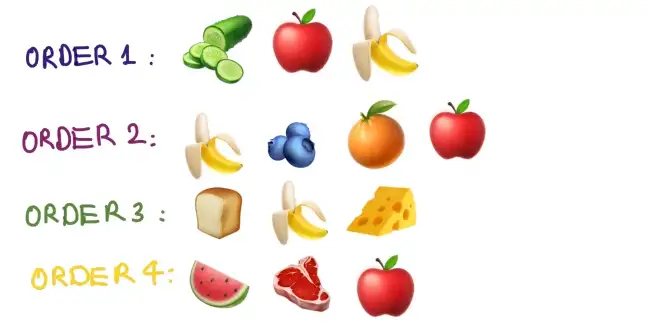

## 3.2 FP Growth Algorithm
    The goal of the FP Growth algorithm is to locate frequent item sets in a dataset while performing more quickly than the Apriori algorithm. The Apriori algorithm basically loops back and forth through the data set to look for product co-occurrence.
    In order to be faster, the FP Growth algorithm changed the organization of the data into a tree rather than sets. This tree data structure allows for faster scanning, and this is where the algorithm wins time.(Verma, 2021)
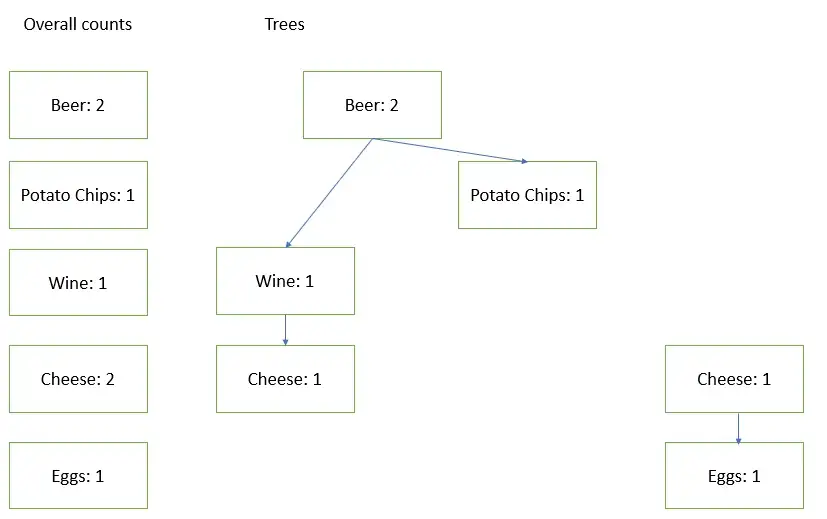

## 3.3 Measures
## 3.3.1 Support
    Support measures how often a product is purchased relatively
## 3.3.2 Confidence
    Confidence, on the other hand, measures the support for all transactions containing elements A and B, and divides them by the support for A
## 3.3.3 Lift
    Metric lift(A->B) indicates the relationship of cooccurrence between item A and B is random or not.
    
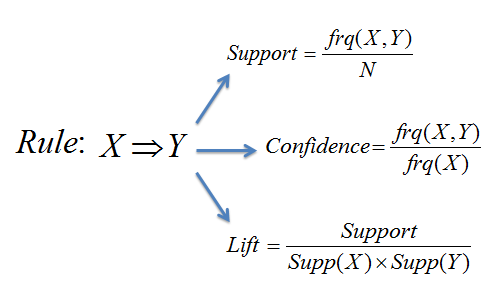(Verma, 2021)

## Perform Market Basket Analysis on the chosen dataset by using Apriori and FP growth algorithms.

## 3.4 Appling MBA in the Dataset

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
warnings.filterwarnings('ignore') # We can suppress the warnings
df = pd.read_csv('data/bread_basket.csv')

## 3.5 Reading the Data

In [58]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


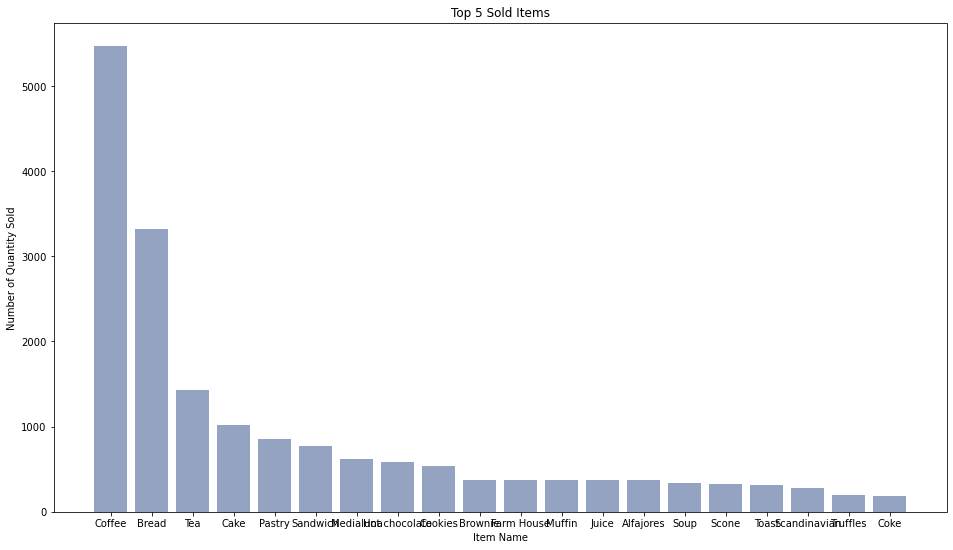

In [72]:
## Creating distribution of Item Sold

Item_distr = df.groupby(by = "Item").size().reset_index(name='Frequency').sort_values(by = 'Frequency',ascending=False).head(20)

## Declaring variables
bars = Item_distr["Item"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

## Defining Figure Size

plt.figure(figsize=(16,9))

# Create bars
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Add title and axis names
plt.title("Top 5 Sold Items")
plt.xlabel("Item Name")
plt.ylabel("Number of Quantity Sold")

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.show()

        The top 20 items sold are described in the chart below. Coffee, bread, and tea are the most popular items in the bakery.

## 3.6 Transforming the data

    Due to the fact that items in a transaction are divided into various rows, I will group those items together in a specific location. The following is the conversion of a list of lists of items.

In [60]:
transactions = []
# Combine items in the same transaction into one place
for i in df.Transaction.unique():
    list_trans = list(set(df[df.Transaction == i]["Item"]))
    if len(list_trans) > 0:
        transactions.append(list_trans)

In [75]:
transactions

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Jam', 'Hot chocolate'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Coffee', 'Pastry', 'Tea'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian'],
 ['Medialuna', 'Bread'],
 ['Tartine', 'Tea', 'Pastry', 'Jam', 'Coffee'],
 ['Bread', 'Coffee', 'Basket'],
 ['Medialuna', 'Bread', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Medialuna', 'Bread', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Bread', 'Farm House'],
 ['Medialuna', 'Bread'],
 ['Medialuna', 'Bread', 'Coffee'],
 ['Jam'],
 ['Muffin', 'Scandinavian'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Bread', 'Coffee'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Muffin', 'Scandinavian'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Bread', 'Coffee'],
 ['Tea', 'Bread'],
 ['Scandinavian'],
 ['Coffee', 'Muffin', 'Juice', 'Tartine'],
 ['Scandinavia

    Once the Apriori and FP Growth module requires a data frame with values of 0 and 1 or True and False, I will use One Hot Encode to encode the data to meet the requirement of the Apriori and Fp Growth module given by mlxtend library.

In [61]:
trans_encoding = TransactionEncoder()
df2 = trans_encoding.fit(transactions).transform(transactions)
df3 = pd.DataFrame(df2, columns=trans_encoding.columns_)
df3

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9461,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


    The frequent sets are found with just one line of code.
    I will use the min_support = 0.05 , which implies the minimum support required for an itemset to be chosen. 
    Meanwhile, use_colnames = True keeps column names for itemsets to make them more understandable.

In [80]:
frequent_set_ap = apriori(df3, min_support = 0.05, use_colnames = True, verbose=1)
frequent_set_ap

Processing 72 combinations | Sampling itemset size 2


,support,itemsets
0,0.327205,(Bread)
1,0.103856,(Cake)
2,0.478394,(Coffee)
3,0.054411,(Cookies)
4,0.058320,(Hot chocolate)
5,0.061807,(Medialuna)
6,0.086107,(Pastry)
7,0.071844,(Sandwich)
8,0.142631,(Tea)
9,0.090016,"(Bread, Coffee)"


    From these frequent sets, I continue to find the association rules that determine if A is purchased, then B is also purchased.
    I set the metric to 'lift,' with a minimum threshold of 1.

In [68]:
rules_ap = association_rules(frequent_set, metric = 'lift', min_threshold = 1)
rules_ap

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905


    As I can see, the results consist of two association rules only. Cake and Coffee are bought more frequently than random with the lift = 1 and 53% confidence.

## 3.7 FP growth algorithm

    In order to compare the Apriori and FP Growth, I will reproduce the same scenary.
    Frequent_Set with "min_support = 0.05" and Rules_fp with "metric=lift" and "min_threshold = 1"

In [69]:
frequent_set_fp = fpgrowth(df3, min_support = 0.05, use_colnames = True, verbose=1)
frequent_set_fp

9 itemset(s) from tree conditioned on items ()
1 itemset(s) from tree conditioned on items (Bread)
0 itemset(s) from tree conditioned on items (Hot chocolate)
0 itemset(s) from tree conditioned on items (Cookies)
0 itemset(s) from tree conditioned on items (Coffee)
0 itemset(s) from tree conditioned on items (Pastry)
0 itemset(s) from tree conditioned on items (Medialuna)
0 itemset(s) from tree conditioned on items (Tea)
1 itemset(s) from tree conditioned on items (Cake)
0 itemset(s) from tree conditioned on items (Sandwich)


,support,itemsets
0,0.327205,(Bread)
1,0.058320,(Hot chocolate)
2,0.054411,(Cookies)
3,0.478394,(Coffee)
4,0.086107,(Pastry)
5,0.061807,(Medialuna)
6,0.142631,(Tea)
7,0.103856,(Cake)
8,0.071844,(Sandwich)
9,0.090016,"(Bread, Coffee)"


In [70]:
rules_fp = association_rules(frequent_set_fp, metric = "lift", min_threshold = 1)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
1,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905


## Can you express major divergence between these models? Compare and contrast the machine learning results obtained based on both algorithms.

I performed a simple Market Basket Analysis applying Apriori and FP- Growth association rule and compared the results using a dataset from a bakery (License: CC0: Public Domain). This dataset has 20507 entries, over 9000 transactions, and 5 columns and can download from this link: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket.
Firstly, in the comparison of the Frequent Sets between Apriori and FP Growth was used the same value for “min_support”


<table><tr>
<td> <img src="image1.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="image2.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>


I could conclude that they shows quitly the same result, the difference is on the order from the itens by the way that both algorithm organize the itens.
Analisying the rules of both algorithm I could conlcude by the same metric and treshold, they perfomed equally.

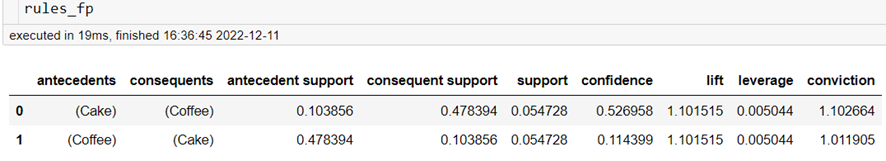
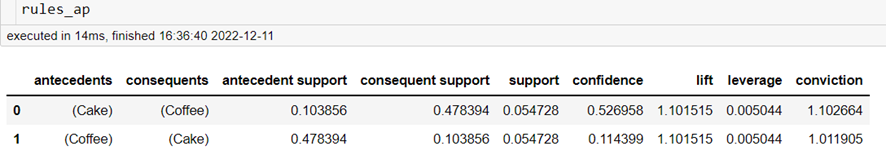

I can conclude the diference between the algorithm was just in the way that they perfomed the analisys, where the Apriori is an algorithm that takes advantage of related sets of objects in data in other words, it aids in the identification of frequently occurring item sets in the other hand the FP Growth is to locate frequent item sets in a dataset while performing more quickly than the Apriori algorithm. In order to be faster, the FP Growth algorithm changed the organization of the data into a tree rather than sets. This tree data structure allows for faster scanning, and this is where the algorithm wins time. (Verma, 2021)

## Conclusion
    Through this project it was possible to conclude the importance of the Recommendation System for companies and Retail in the midst of the competitive environment and how much a system can influence the growth of sales and revenues for a company.

    It was also possible to conclude that Market basket analysis can increase sales and customer satisfaction. Using data to determine that products are often purchased together, retailers can optimize product placement, offer special deals and create new product bundles to encourage further sales of these combinations.

    These improvements can generate additional sales for the retailer, while making the shopping experience more productive and valuable for customers. 


Reference list
Baptiste Rocca (2019). Introduction to recommender systems. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-recommender-systems-6c66cf15ada [Accessed 4 Dec. 2022].

Benjamin Dias, M., Locher, D., Li, M., El-Deredy, W. and J. G. Lisboa, P. (2014). The Value of Personalised Recommender Systems to e-Business: A Case Study. [online] Available at: https://www.researchgate.net/profile/Wael-El-Deredy/publication/221141044_The_value_of_personalised_recommender_systems_to_e-business/links/0deec53299f308abe0000000/The-value-of-personalised-recommender-systems-to-e-business.pdf [Accessed 4 Dec. 2022].

Bloomberg L.P. (2019). Alibaba Beats Estimates as Personalised Recommendations Boost Sales. [online] The Business of Fashion. Available at: https://www.businessoffashion.com/articles/china/alibaba-beats-estimates-as-recommendations-boost-sales/ [Accessed 4 Dec. 2022].

Glauber, R. and Loula, A. (2019). Collaborative Filtering vs. Content-Based Filtering: Differences and Similarities. [online] Available at: https://arxiv.org/pdf/1912.08932.pdf.

IBM Corporation (2021). Similarity threshold. [online] www.ibm.com. Available at: https://www.ibm.com/docs/en/db2/9.7?topic=clustering-similarity-threshold [Accessed 3 Dec. 2022].

Jurafsky, D. (2021). Recommender Systems 3 User User Collaborative Filtering. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=qEur4Xi8dks [Accessed 5 Dec. 2022].

Laerd Statistics (2018). Pearson Product-Moment Correlation. [online] Laerd.com. Available at: https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php [Accessed 3 Dec. 2022].

MacKenzie, I., Meyer, C. and Noble, S. (2013). How retailers can keep up with consumers. [online] McKinsey & Company. Available at: https://www.mckinsey.com/industries/retail/our-insights/how-retailers-can-keep-up-with-consumers.

Smart Software Development, E. (2020). Amazon’s Recommendation algorithm Drives 35% of its Sales. [online] Evdelo. Available at: https://evdelo.com/amazons-recommendation-algorithm-drives-35-of-its-sales/.

Verma, Y. (2021). Apriori vs FP-Growth in Market Basket Analysis - A Comparative Guide. [online] Analytics India Magazine. Available at: https://analyticsindiamag.com/apriori-vs-fp-growth-in-market-basket-analysis-a-comparative-guide/ [Accessed 8 Dec. 2022].
